# Data Exploration and Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Training and Testing DataFrame Creation
# Note : Due to large number of record in datasets , selecting 50000 records

In [5]:
# Load the training and test dataset
train_data = pd.read_csv('fraudTrain.csv')
train_data = train_data.head(50000)

test_data = pd.read_csv('fraudTest.csv')
test_data = test_data.head(50000)

# Prepare the data for model training

In [8]:
# Display basic information about the dataset
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   trans_date_trans_time  50000 non-null  object 
 2   cc_num                 50000 non-null  int64  
 3   merchant               50000 non-null  object 
 4   category               50000 non-null  object 
 5   amt                    50000 non-null  float64
 6   first                  50000 non-null  object 
 7   last                   50000 non-null  object 
 8   gender                 50000 non-null  object 
 9   street                 50000 non-null  object 
 10  city                   50000 non-null  object 
 11  state                  50000 non-null  object 
 12  zip                    50000 non-null  int64  
 13  lat                    50000 non-null  float64
 14  long                   50000 non-null  float64
 15  ci

In [11]:
# Display basic information about the dataset
print(test_data.info())
print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   trans_date_trans_time  50000 non-null  object 
 2   cc_num                 50000 non-null  int64  
 3   merchant               50000 non-null  object 
 4   category               50000 non-null  object 
 5   amt                    50000 non-null  float64
 6   first                  50000 non-null  object 
 7   last                   50000 non-null  object 
 8   gender                 50000 non-null  object 
 9   street                 50000 non-null  object 
 10  city                   50000 non-null  object 
 11  state                  50000 non-null  object 
 12  zip                    50000 non-null  int64  
 13  lat                    50000 non-null  float64
 14  long                   50000 non-null  float64
 15  ci

In [13]:
# Class distribution
class_distribution = train_data['is_fraud'].value_counts(normalize=False)
print("Class distribution:\n", class_distribution)

# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows with any missing values
train_data.dropna(inplace=True)

Class distribution:
 is_fraud
0    49552
1      448
Name: count, dtype: int64
Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [15]:
# Class distribution
class_distribution = test_data['is_fraud'].value_counts(normalize=False)
print("Class distribution:\n", class_distribution)

# Check for missing values
missing_values = test_data.isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows with any missing values
test_data.dropna(inplace=True)

Class distribution:
 is_fraud
0    49801
1      199
Name: count, dtype: int64
Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [17]:
# Drop unnecessary columns (e.g., names, addresses, and any other non-numeric identifiers)
train_data = train_data.drop(columns=['trans_date_trans_time', 'cc_num', 'trans_num', 'dob', 'street', 'city', 'state', 'zip', 'first', 'last', 'job'], errors='ignore')

# Convert categorical variables to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['merchant', 'category', 'gender'], drop_first=True)

# Check the updated dataframe
print("Columns after encoding:\n", train_data.columns)

Columns after encoding:
 Index(['Unnamed: 0', 'amt', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_fraud_Abbott-Steuber',
       ...
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object', length=715)


In [19]:
# Drop unnecessary columns (e.g., names, addresses, and any other non-numeric identifiers)
test_data = test_data.drop(columns=['trans_date_trans_time', 'cc_num', 'trans_num', 'dob', 'street', 'city', 'state', 'zip', 'first', 'last', 'job'], errors='ignore')

# Convert categorical variables to numerical using one-hot encoding
test_data = pd.get_dummies(test_data, columns=['merchant', 'category', 'gender'], drop_first=True)

# Check the updated dataframe
print("Columns after encoding:\n", test_data.columns)

Columns after encoding:
 Index(['Unnamed: 0', 'amt', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_fraud_Abbott-Steuber',
       ...
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object', length=715)


In [21]:
# Split the data into features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

In [23]:
# Split the data into features and target
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [25]:
# Check class distribution in training and testing sets
print("Class distribution in training set:\n", y_train.value_counts())
print("Class distribution in testing set:\n", y_test.value_counts())

# Check if y_train has more than one class
if y_train.nunique() <= 1:
    raise ValueError("The training set does not contain both classes. Please check the dataset.")


# Check if y_train has more than one class
if y_test.nunique() <= 1:
    raise ValueError("The testinging set does not contain both classes. Please check the dataset.")

Class distribution in training set:
 is_fraud
0    49552
1      448
Name: count, dtype: int64
Class distribution in testing set:
 is_fraud
0    49801
1      199
Name: count, dtype: int64


# Imbalance data Handling

In [28]:
# Apply SMOTE for oversampling the minority class only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# Check the shapes of the final datasets
print("Shapes of the datasets:")
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test shape:", y_test.shape)

Shapes of the datasets:
X_train_resampled shape: (99104, 714)
X_test shape: (50000, 714)
y_train_resampled shape: (99104,)
y_test shape: (50000,)


In [29]:
import numpy as np
from sklearn.utils import class_weight

# Calculate class weights
classes = np.array([0, 1])  # Convert to NumPy array
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights_dict)

Class weights: {0: 0.504520503713271, 1: 55.80357142857143}


# Model Development (Supervised)

# baseline model Logistic Regression Model with class weight

In [34]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are already defined

# Step 1: Train Logistic Regression model
log_model = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)
log_model.fit(X_train, y_train)

# Step 2: Save the model to a file
joblib.dump(log_model, 'logistic_model1.pkl')

# Step 3: Load the model from the file
loaded_log_model = joblib.load('logistic_model1.pkl')

# Step 4: Make predictions with the loaded model
y_pred_loaded_log = loaded_log_model.predict(X_test)

# Step 5: Evaluation of the loaded model
print("Loaded Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_loaded_log))
print("Loaded Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded_log))

Loaded Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     49801
           1       0.11      0.63      0.19       199

    accuracy                           0.98     50000
   macro avg       0.56      0.81      0.59     50000
weighted avg       0.99      0.98      0.99     50000

Loaded Confusion Matrix:
 [[48801  1000]
 [   73   126]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Without hyperparameter tuning Logistic Regression Model with SMOTE for oversampling

In [37]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are already defined

# Step 1: Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Save the model to a file
joblib.dump(log_model, 'logistic_model.pkl')

# Step 3: Load the model from the file
loaded_log_model = joblib.load('logistic_model.pkl')

# Step 4: Make predictions with the loaded model
y_pred_loaded_log = loaded_log_model.predict(X_test)

# Step 5: Evaluation of the loaded model
print("Loaded Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_loaded_log))
print("Loaded Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded_log))

Loaded Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49801
           1       0.00      0.00      0.00       199

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      1.00      0.99     50000

Loaded Confusion Matrix:
 [[49770    31]
 [  199     0]]


# After hyperparameter tuning with Logistic Regression Model

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and elasticnet
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500), 
                           param_grid, 
                           scoring='f1', 
                           cv=3)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Optionally, you can evaluate the best model found
best_model_log = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_log = best_model_log.predict(X_test)

# Evaluation
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best_log))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_log))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best parameters found:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49801
           1       0.00      0.00      0.00       199

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      1.00      0.99     50000

Best Model Confusion Matrix:
 [[49801     0]
 [  199     0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Without hyperparameter tuning XGBoost model with SMOTE for oversampling

In [42]:
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are already defined

# Step 1: Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Save the model to a file
joblib.dump(xgb_model, 'xgb_model.pkl')

# Step 3: Load the model from the file
loaded_model = joblib.load('xgb_model.pkl')

# Step 4: Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Step 5: Evaluation of the loaded model
print("Loaded XGBoost Classification Report:\n", classification_report(y_test, y_pred_loaded))
print("Loaded Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Loaded XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49801
           1       0.74      0.43      0.54       199

    accuracy                           1.00     50000
   macro avg       0.87      0.71      0.77     50000
weighted avg       1.00      1.00      1.00     50000

Loaded Confusion Matrix:
 [[49771    30]
 [  114    85]]


# After hyperparameter tuning with XGBoost Model

In [44]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid, 
                           scoring='f1', 
                           cv=3)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Optionally, you can evaluate the best model found
best_model_xgb= grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Evaluation
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters found:  {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 300}
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49801
           1       0.68      0.40      0.50       199

    accuracy                           1.00     50000
   macro avg       0.84      0.70      0.75     50000
weighted avg       1.00      1.00      1.00     50000

Best Model Confusion Matrix:
 [[49763    38]
 [  119    80]]


# Model Development (Unsupervised)

# Anomaly detection Isolation Forest algorithm

In [47]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X_train)

# Mark anomalies
train_data['anomaly'] = outliers
anomalies = train_data[train_data['anomaly'] == -1]
print("Detected anomalies:\n", anomalies)

Detected anomalies:
        Unnamed: 0     amt      lat      long  city_pop   unix_time  merch_lat  \
73             73  317.14  35.2563 -111.9500       759  1325379372  35.268124   
433           433   62.62  20.0271 -155.3697      1490  1325396656  19.209212   
671           671  154.91  64.7556 -165.6723       145  1325407543  65.336985   
799           799    1.63  38.5677 -109.5271      9772  1325412768  38.208416   
1003         1003    9.32  20.0271 -155.3697      1490  1325421693  20.515285   
...           ...     ...      ...       ...       ...         ...        ...   
49731       49731    2.26  39.5483 -119.7957    276896  1327869455  38.659232   
49814       49814   58.67  64.7556 -165.6723       145  1327872030  64.914894   
49840       49840   76.72  20.0827 -155.4880      4878  1327872870  19.314738   
49891       49891   31.48  64.7556 -165.6723       145  1327874340  63.932882   
49909       49909  666.70  29.7396  -95.4460   2906700  1327874723  29.806815   

      

# Model performance for both supervised and unsupervised

Logistic Regression - Accuracy: 0.9960, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, ROC AUC: 0.7568


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


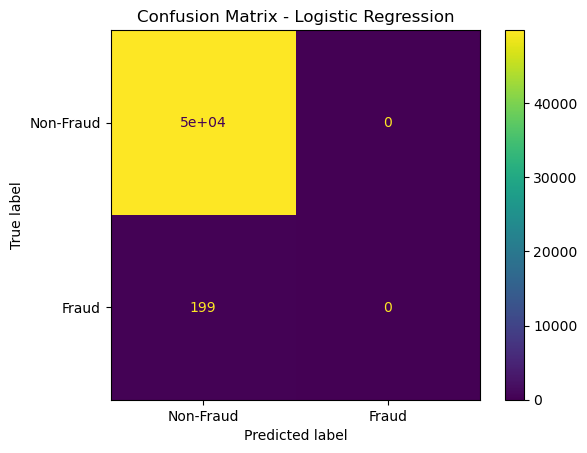

XGBoost - Accuracy: 0.9969, Precision: 0.6780, Recall: 0.4020, F1 Score: 0.5047, ROC AUC: 0.9205


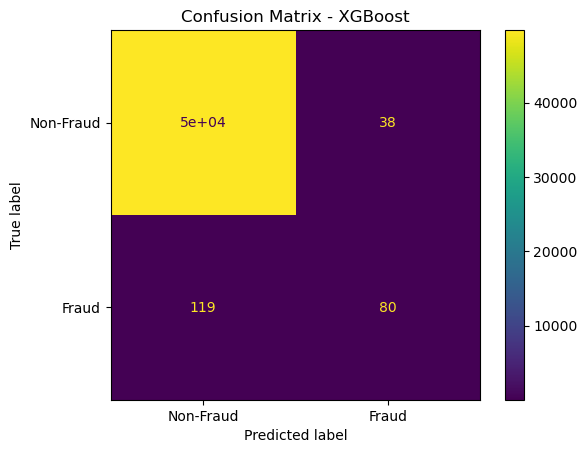

In [49]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate Logistic Regression
log_accuracy = best_model_log.score(X_test, y_test)
log_precision = precision_score(y_test, y_pred_best_log)
log_recall = recall_score(y_test, y_pred_best_log)
log_f1 = f1_score(y_test, y_pred_best_log)
log_roc_auc = roc_auc_score(y_test, best_model_log.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {log_accuracy:.4f}, Precision: {log_precision:.4f}, Recall: {log_recall:.4f}, F1 Score: {log_f1:.4f}, ROC AUC: {log_roc_auc:.4f}")

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_best_log)
ConfusionMatrixDisplay(cm_log, display_labels=['Non-Fraud', 'Fraud']).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Evaluate XGBoost
xgb_accuracy = best_model_xgb.score(X_test, y_test)
xgb_precision = precision_score(y_test, y_pred_best_xgb)
xgb_recall = recall_score(y_test, y_pred_best_xgb)
xgb_f1 = f1_score(y_test, y_pred_best_xgb)
xgb_roc_auc = roc_auc_score(y_test, best_model_xgb.predict_proba(X_test)[:, 1])

print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1 Score: {xgb_f1:.4f}, ROC AUC: {xgb_roc_auc:.4f}")

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=['Non-Fraud', 'Fraud']).plot()
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Model Evaluation ROC-AUC Curves for both supervised and unsupervised model

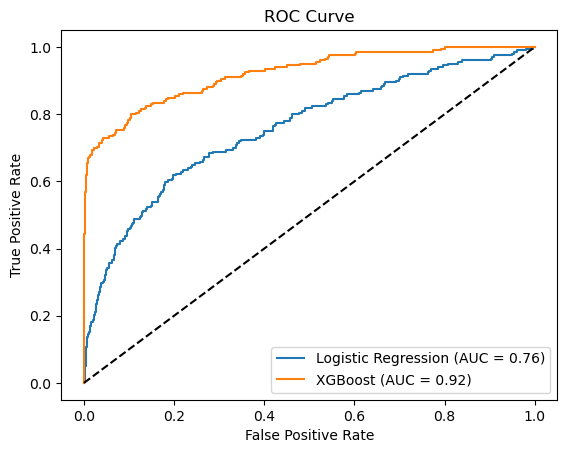

In [51]:
from sklearn.metrics import roc_curve

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, best_model_log.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(log_roc_auc))

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_model_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Basic Explainability

# XGBoost model, extract feature importance to identify the top 10 features impacting fraud classification

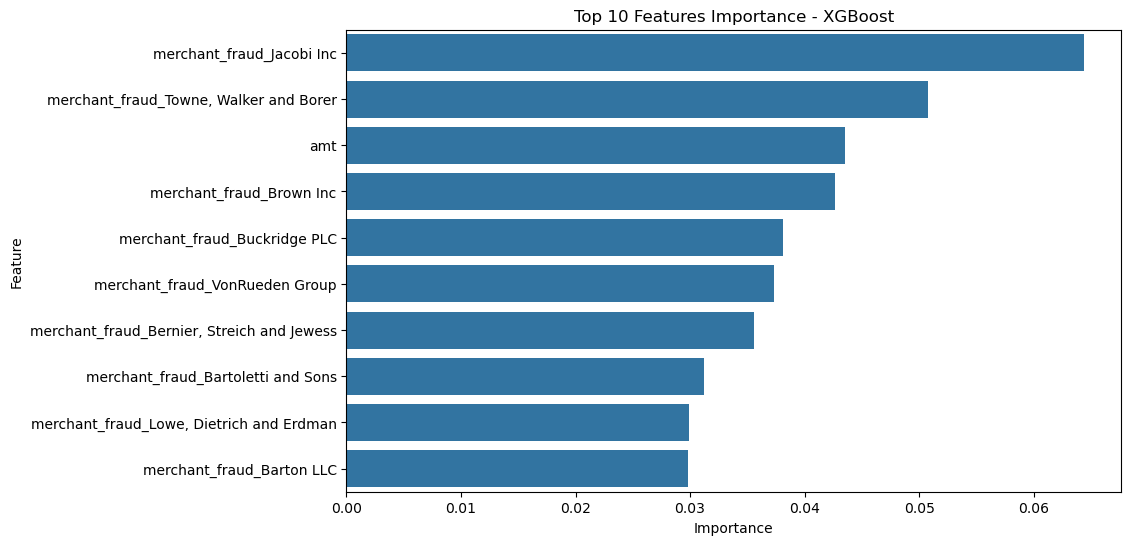

In [54]:
# Feature importance from XGBoost
importances = best_model_xgb.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Importance - XGBoost')
plt.show()

# Using SHAP for identifying feature importance

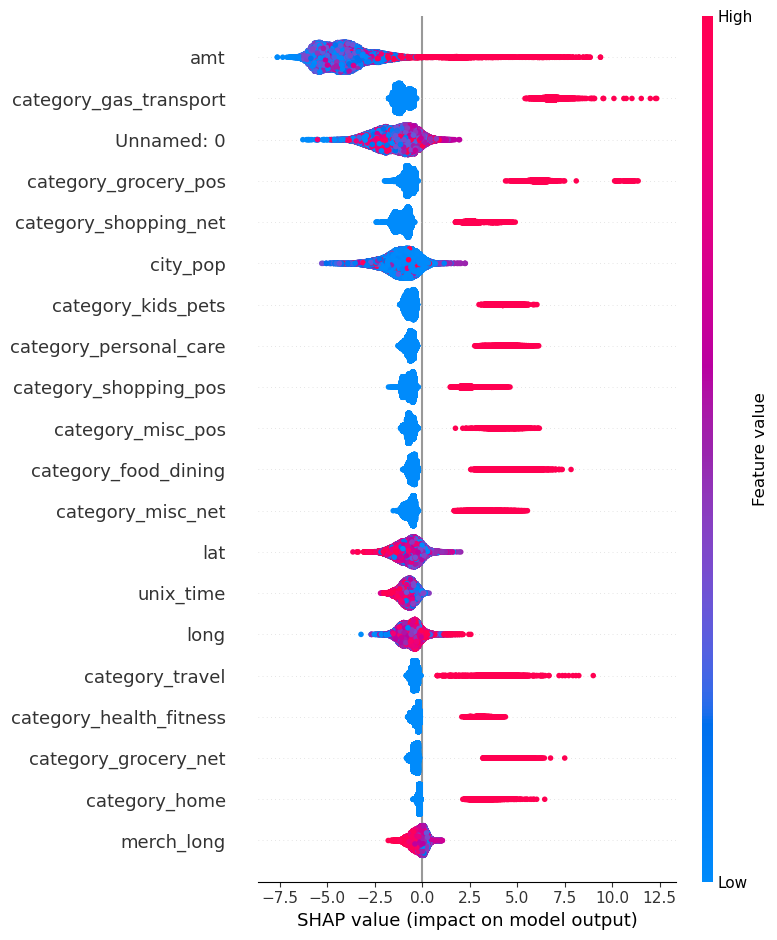

In [56]:
# Scale numerical features and keep the feature names
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Convert scaled X_test back to DataFrame with original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# SHAP values for model interpretability
explainer = shap.Explainer(best_model_xgb)
shap_values = explainer(X_test_scaled_df)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled_df)

# Force plot for a single prediction
shap.initjs()
# Use the first instance's SHAP values and the corresponding feature values
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test_scaled_df.iloc[0])